# x-ray

In [1]:
import numpy as np
from ROOT import TCanvas, TGraphErrors, TF1, TGraph,TLatex,TH1F, gStyle
from ROOT import gROOT
from array import array
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.16/00


In [2]:
file_kv = open('173T-0-70U1-1-33U3.txt', "r")
file_kv.readline()
file_kv.readline()
file_kv.readline()
file_kv.readline()
file_kv.readline()
x = []
y = []
for line in file_kv:
    string = line.split("\t")
    y.append(float(string[3]))
    x.append(float(string[4])) 
ndata = len(x)
data=[4.95,4.5,5.25,4.8,5.25,4.65,4.95,4.8,5.1,4.95,4.95,5.1,5.25,4.95,5.4,4.95,4.8,5.25,4.8,4.95,5.1,4.8,4.95,5.1,5.1,5.25,4.65,4.8,4.95,5.1,4.95,4.95,5.1,4.95,4.65,5.1,4.9,5.15,5.4,5.8,5.1]

In [3]:
x  =  array( 'f', x)
y  =  array( 'f', y)

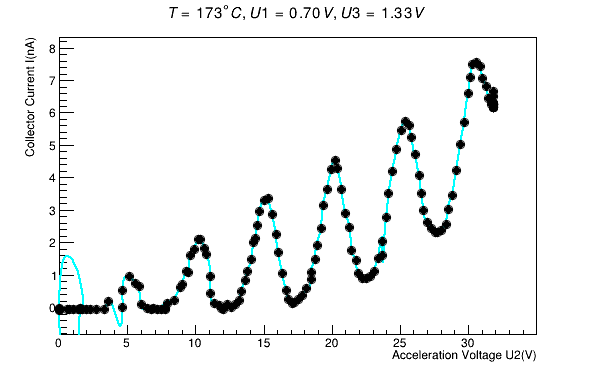

In [4]:
c1 = TCanvas( 'c1', 'Calibration Measurement at 35kV', 200, 10, 600, 400 )
             
mygraph = TGraph(ndata,x,y)
mygraph.Draw("ACP")
mygraph.SetTitle("T=173^{\circ}C, U1=0.70V, U3=1.33V")
mygraph.SetLineColor( 7 )
mygraph.SetLineWidth( 2 )
mygraph.SetMarkerColor( 1 )
mygraph.SetMarkerStyle( 8 )

mygraph.GetXaxis().SetTitle( 'Acceleration Voltage U2(V)' )
mygraph.GetYaxis().SetTitle( 'Collector Current I(nA)' )

c1.Draw()

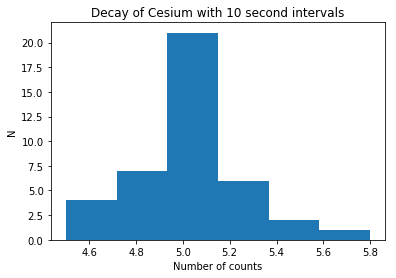

In [5]:
plt.figure()
plt.hist(data,6)
plt.ylabel("N")
plt.xlabel("Number of counts")
plt.title("Decay of Cesium with 10 second intervals")
plt.show()

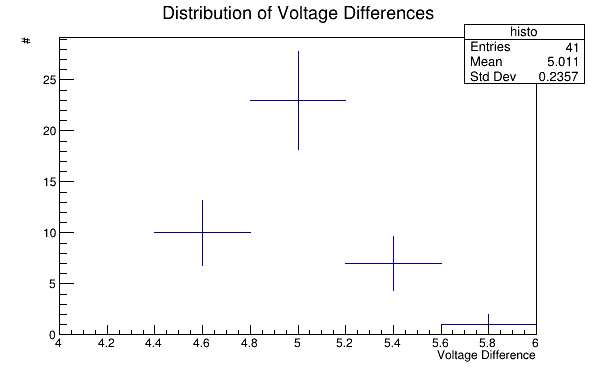

In [6]:
c2 = TCanvas( 'c2', 'Poisson Graph', 200, 10, 600, 400 ) 

histo = TH1F("histo", "Distribution of Voltage Differences", 5, 4, 6) 

histo.GetYaxis().SetTitle("#")
histo.GetXaxis ().SetTitle ("Voltage Difference");

for data_point in data:
    histo.Fill(data_point)
    
histo.SetFillColor(8)
histo.Draw("E")

c2.Draw()

 FCN=0.431363 FROM MINOS     STATUS=SUCCESSFUL     91 CALLS         278 TOTAL
                     EDM=1.11876e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.23718e+01   4.98074e+00   7.71405e-02  -1.36268e-04
   2  Mean         4.96859e+00   4.96090e-02  -2.02809e-04   3.81510e-03
   3  Sigma        2.94782e-01   5.26682e-02   5.26682e-02  -3.02084e-02


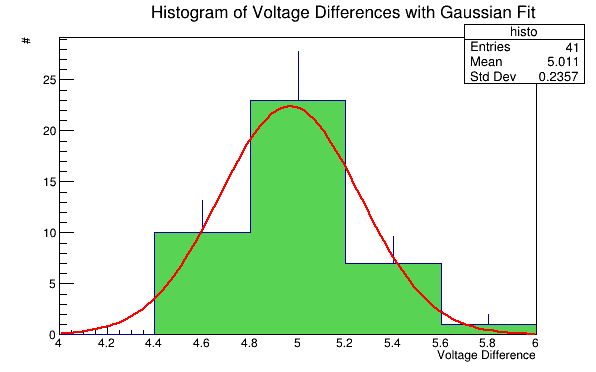

In [7]:
fgaus = TF1("fgaus","gaus")
fgaus.SetParameters(10, 100, 5) # give reasonable estimates for your parameters to guide ROOT fit to converge
fgaus.SetFillColor(42);
histo.Fit("fgaus", "E")

histo.SetTitle("Histogram of Voltage Differences with Gaussian Fit")
histo.Draw("same")
c2.Draw("same")